## Description
Fashion_MNIST data and description is available on github: https://github.com/zalandoresearch/fashion-mnist <br>

It consists of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes as given below:

**Label 	Description** <br>
0 	T-shirt/top <br>
1 	Trouser <br>
2 	Pullover <br>
3 	Dress <br>
4 	Coat <br>
5 	Sandal <br>
6 	Shirt <br>
7 	Sneaker <br>
8 	Bag <br>
9 	Ankle boot <br>

**Points to be Noted**
1. Each image is of size 28x28 = 784 pixels.
2. Grayscale images have a total of 255 shades/pixels ranges from 0 to 255 to define how much dark or light that pixel will be. 0 = Maximum Dark; 255 = Maximum White.
3. Each row is a separate image and column as labels (0-9).

## Import Modules

In [37]:
# !pip install -U tensorflow==2.0.0-beta1  # to install tensorflow 2.0-beta1 in Kaggle notebook
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
print(tf.__version__)   # prints tensorflow installed version
from tensorflow import keras

2.0.0-beta1


## Download Fashion MNIST Data
Since this data is already added in tensorflow and an api is created. So, we can directly use that api to directly downlaod the data from server.

In [38]:
mnist = tf.keras.datasets.fashion_mnist
(x_training_images, y_training_labels), (x_testing_images, y_testing_labels) = mnist.load_data()

## Prints some of the Loaded Dataset
Notice all the values of pixels ranges from 0-255 because of grayscale images

4
[[  0   0   0   0   0   0   0   0   1   0   0 127 138 102 109 134 126  92
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   2   0  24 154 187 239 188 255 154 148
    0   0   1   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   9   0  92 151 170 158  70 194 124 150
   11   0   5   0   1   0   0   0   0   0]
 [  0   0   0   0   0   0   1   0   0   0 160 191 202 147  93 177 137 143
   85   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   0  48 109 181 192 187 141 102 212 151 117
  150  96  17   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 113 138 124 145 147 170 109 116 141 143 107
  128 124 130  66   0   1   0   0   0   0]
 [  0   0   0   0   0   0  39 148 119 119 109 103 121 106 110 106 137 102
  110 114 119 126   0   0   0   0   0   0]
 [  0   0   0   0   0   0  70 162 123 114 102 177 147  97 117 102 141 107
  100 110 123 141  38   0   0   0   0   0]
 [  0   0   0   0   0   0 127 151 145 117 111 123 120 106 116 

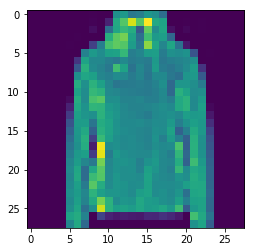

In [39]:
import matplotlib.pyplot as plt
print(y_training_labels[59990])  # Display the training label for the image number passed ranges from 0-59999
print(x_training_images[59990])      # Display the training image data correponding to number passed
plt.imshow(x_training_images[59990]) # Display the image correponding to index passed
#plt.imshow(x_training_images[59990], cmap='gray')  # Display image in grayscale

## Normalize the Input Dataset
Data required by Neural network ranges from -1 to 1 or 0 to 1. So, we can do it simply by dividing each image pixel with 255

In [40]:
# x_training_images = x_training_images.astype('float32')
# x_test_images = x_test_images.astype('float32')
x_training_images  = x_training_images / 255.0  # divide by 255.0 to make output as float32 value
x_testing_images = x_testing_images / 255.0

## Define the Model
Sequential: That defines a SEQUENCE of layers in the neural network

Flatten: It takes the input 2d image (for eg. 28x28) and converts or flatten it into a 1 dimensional vector (784).

Dense: Adds a layer of neurons

Each layer of neurons need an activation function to tell them what to do. 
Relu effectively means "If X>0 return X, else return 0" -- so what it does it it only passes values 0 or greater to the next layer in the network.

Softmax takes a set of values, and effectively picks the biggest one, so, for example, if the output of the last layer looks like [0.1, 0.1, 0.05, 0.1, 9.5, 0.1, 0.05, 0.05, 0.05], it converts it into [0,0,0,0,1,0,0,0,0] and gives the biggest value


In [41]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), # added 1st layer with 128 neurons
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)]) # Added 2nd/Output layer with 10 neurons because our output is catagorized into 10 classes

## Compile & Train the Model
Notice the Loss and accuracy on completion. Both should be inversely proportional to each other. The EPOCH's can be set to value untill the Loss keeps on going down and accuracy keep son increasing

In [42]:
model.compile(optimizer = 'Adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])
# Train the model
history = model.fit(x_training_images, y_training_labels, epochs=30)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 4s 75us/sample - loss: 0.4981 - accuracy: 0.8253
Epoch 2/30
60000/60000 [==============================] - 4s 69us/sample - loss: 0.3755 - accuracy: 0.8650
Epoch 3/30
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3368 - accuracy: 0.8775
Epoch 4/30
60000/60000 [==============================] - 4s 70us/sample - loss: 0.3131 - accuracy: 0.8854
Epoch 5/30
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2947 - accuracy: 0.8905
Epoch 6/30
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2819 - accuracy: 0.8954
Epoch 7/30
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2686 - accuracy: 0.9010
Epoch 8/30
60000/60000 [==============================] - 4s 67us/sample - loss: 0.2586 - accuracy: 0.9037
Epoch 9/30
60000/60000 [==============================] - 4s 68us/sample - loss: 0.2469 - accuracy: 0.9075
Epoch 10/30
60

## Test the Model using Test set
It returns the loss value & Accuracy for test data. This is the step where the model is given with new unseen images to check how well it has learned.
Notice that Loss and Accuracy will be somewhat lesser that the training Loss and accuracy but its fine


In [43]:
test_score = model.evaluate(x_testing_images, y_testing_labels)  # Returns the loss value & accuracy of model in test mode. Computation is done in batches.
print(test_score)
print(f"Test Loss = {test_score[0]}")
print(f"Test Accuracy = {test_score[1]}")

10000/10000 [==============================] - 0s 45us/sample - loss: 0.3785 - accuracy: 0.8881
[0.37845147188305855, 0.8881]
Test Loss = 0.37845147188305855
Test Accuracy = 0.8881000280380249


It returns the a list of 10 numbes which shows the prediction probability for a given image for classes `0 to 9`. Or it is like how much confident the model is to predict which class the given image belogs to.



[4.0569901e-03 1.7593360e-04 9.9516124e-01 1.0143161e-09 5.4332608e-04
 8.0120698e-16 6.2244893e-05 4.9057753e-09 1.9474136e-07 7.3967593e-10]
2


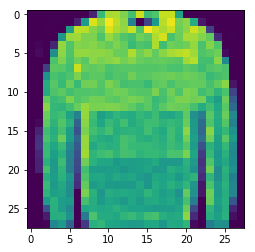

In [44]:
# Returns numpy array of predictions
classifications = model.predict(x_testing_images)  # generates output predictions for input samples. COmputation is done in batches

print(classifications[20])
print(y_testing_labels[20])
#print(y_testing_labels[0])
plt.imshow(x_testing_images[20]) # Display the image correponding to index passed
# As you can see from tha table in begining that number 2 is Pullover. So, our model has predicted well 

## Callback

In [45]:
import tensorflow as tf
print(tf.__version__)

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('loss')<0.4):
      print("\nReached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(x_training_images, y_training_labels), (x_test_images, y_test_labels) = mnist.load_data()
x_training_images = x_training_images/255.0
x_test_images = x_test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(x_training_images, y_training_labels, epochs=10, callbacks=[callbacks])


2.0.0-beta1
Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 101us/sample - loss: 0.4729
Epoch 2/10
59936/60000 [============================>.] - ETA: 0s - loss: 0.3603
Reached 60% accuracy so cancelling training!
60000/60000 [==============================] - 6s 93us/sample - loss: 0.3605
